In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import gc

In [2]:
np.random.seed(789)
tf.set_random_seed(789)

In [3]:
cpn_grp = pd.read_csv("U:\Datasets\CouponGroup.csv")

In [5]:
del cpn_grp
gc.collect()
cpn_grp = pd.DataFrame()

In [4]:
cpn_grp.head()

,CouponID,PlayerID,Status,CouponGroupID,PM_Create_Date,PM_Last_Update
0,23221,1000676104,R,43426921,NaN,2016-11-01 18:05:03.340000000
1,23220,1000676104,R,43442683,NaN,2016-11-01 18:05:03.340000000
2,23222,1000676104,R,43456512,NaN,2016-11-01 18:05:03.340000000
3,24069,1000676104,I,44723989,NaN,2016-11-01 18:05:03.340000000
4,24070,1000676104,I,44737681,NaN,2016-11-01 18:05:03.340000000


In [5]:
dim_cpn = pd.read_csv("U:\Datasets\DimCoupon.csv", encoding = 'cp1252')

In [6]:
dim_cpn.head()

,CouponID,Description,CouponValue,Type,TypeDesc,FrequencyStartDate,FrequencyEndDate,ValueType,ValueTypeDesc,MaxAllowedPerDay,...,ValidMonth,ValidYear,TypeCategory,TypeDescription,SubType,SubTypeDescription,TargetPopKey,TargetPop,ProgramTypeKey,ProgramType
0,89337,M0117GRETCP- Rep E Throw$20 PR,20.00,2,Anonymous,2017-01-13,2017-01-13,3,Comp,1,...,1,17,h,Gift,O,Other,N,Not Applicable,N,Not Applicable
1,89348,M0117DCHHP-Diam Ch H Pad15GP,15.00,2,Anonymous,2017-01-20,2017-01-20,2,XtraCredit,1,...,1,17,a,Cash,a,Cash,d,Loyalty,a,Gazette
2,89423,H0117GGSF-FreeScarf,10.75,1,Marketed,2017-01-16,2017-01-17,1,Fixed,1,...,1,17,h,Gift,O,Other,N,Not Applicable,N,Not Applicable
3,89437,C0217K1UYSCD-$20 Cash UYS,20.00,2,Anonymous,2017-02-19,2017-02-20,1,Fixed,1,...,2,17,a,Cash,a,Cash,N,Not Applicable,N,Not Applicable
4,89448,C0117K1BBHTC-20 BBACK GP,20.00,2,Anonymous,2017-01-25,2017-01-26,2,XtraCredit,3,...,1,17,a,Cash,a,Cash,N,Not Applicable,N,Not Applicable


In [7]:
dim_play = pd.read_csv("U:\Datasets\DimPlayer.csv", low_memory = False)

In [8]:
dim_play.head()

,PrimaryPropertyID,PrimaryPropertyName,PlayerID,City,State,ZipCode,TierID,TierName,DistFromML,DistFromHK,...,Deceased Flag,DMA Flag,Person # Marital Status,Estimated Current Home Value,Children Presence of Children 0-18,DSE Discretionary Spend Estimate,Est Household Income V6,PIQ Match Type,NCOA MOVE DATE,NCOA Move Type
0,1,Grand Casino ML,33,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,No,No,Married Extremely Likely,250300,Not as Likely to have a child,17831,138,Individual Match,NaN,Did Not Move
1,1,Grand Casino ML,10014,GARFIELD,MN,56332,25,Preferred,89.0,126.0,...,No,No,Married Extremely Likely,275300,Not Likely to have a child,16028,36,Individual Match,NaN,Did Not Move
2,1,Grand Casino ML,10025,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,No,No,Unknown Scored,256800,Not Likely to have a child,27864,18,Individual Match,NaN,Did Not Move
3,1,Grand Casino ML,10063,TALMOON,MN,56637,25,Preferred,104.0,115.0,...,No,No,Married Extremely Likely,0,Not Likely to have a child,16742,49,Individual Match,NaN,Did Not Move
4,1,Grand Casino ML,10187,PEQUOT LAKES,MN,56472,25,Preferred,51.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dim_cpnredeem = pd.read_csv("U:\Datasets\FactCouponRedeem.csv", encoding = 'cp1252')

In [10]:
dim_cpnredeem.head()

,CouponID,Description,PlayerID,AccountingDate,RedeemValue,RedeemCount,SiteID,RedemptionNumber,ValidMonth,ValidYear,TypeCategory,TypeDescription,SubType,SubTypeDescription,TargetPopKey,TargetPop,ProgramTypeKey,ProgramType
0,89729,M1216VHNY- VIP NYE HTL,530342410,2017-01-01,29.0,1,1,NaN,12,16,b,Hotel,a,ML,a,VIP,N,Not Applicable
1,89729,M1216VHNY- VIP NYE HTL,710328524,2017-01-01,29.0,1,1,NaN,12,16,b,Hotel,a,ML,a,VIP,N,Not Applicable
2,89093,C1016OGDO1E-Decline GP WKND 5,1000600137,2017-01-01,5.0,1,2,NaN,10,16,e,Free Slot Gaming,a,Grand Play,N,Not Applicable,N,Not Applicable
3,89729,M1216VHNY- VIP NYE HTL,710004002,2017-01-01,29.0,1,1,NaN,12,16,b,Hotel,a,ML,a,VIP,N,Not Applicable
4,4,HNEW MEMBER TRACKING,1000681589,2017-01-01,0.0,1,2,NaN,4,7,O,Other,O,Other,c,New Member,N,Not Applicable


In [11]:
dim_playerday = pd.read_csv("U:\Datasets\PlayerDay.csv")

In [12]:
dim_playerday.head()

,SiteID,PlayerID,Date_Value,TtlBet,Theo,Actual,Comp,MktedCouponsRedemption,KioskRedemptions,PointsToCash,...,Slot_PointsEarned,Table_CompEarned,Table_PointsEarned,Days,NonGamingPointsEarned,NonGamingCompEarned,ADT,ADW,TierID,TierName
0,2,1000382937,2017-03-01 00:00:00,582.00,47.90,-23.43,0.0,0.01,5.0,0.0,...,38,0.0,0,1,0,0.0,30.7840,30.7840,25,Preferred
1,2,530533484,2017-03-01 00:00:00,3374.75,322.60,96.65,0.0,0.00,0.0,0.0,...,225,0.0,0,1,0,0.0,242.0050,242.0050,25,Preferred
2,1,530086340,2017-03-01 00:00:00,713.35,39.04,-32.10,0.0,0.00,0.0,0.0,...,33,0.0,0,1,0,0.0,47.8733,47.8733,24,Silver
3,2,710028836,2017-03-01 00:00:00,0.00,0.00,0.00,0.0,0.00,5.0,0.0,...,0,0.0,0,1,0,0.0,6.3400,6.3400,25,Preferred
4,1,1000611579,2017-03-01 00:00:00,951.10,83.13,-187.84,0.0,0.00,0.0,0.0,...,63,0.0,0,1,0,0.0,89.5912,89.5913,24,Silver


**Summarize the dataframes**

In [23]:
cpn_grp.describe()

,CouponID,PlayerID,CouponGroupID
count,1.230002e+08,1.230002e+08,1.230002e+08
mean,9.087997e+04,7.323696e+08,2.258907e+08
std,7.477546e+03,2.786351e+08,3.617827e+07
min,2.700000e+01,3.300000e+01,9.000000e+01
25%,8.462100e+04,5.304837e+08,1.951093e+08
50%,9.109600e+04,7.105478e+08,2.260334e+08
75%,9.717500e+04,1.000290e+09,2.570763e+08
max,1.035310e+05,1.000805e+09,2.879805e+08


In [20]:
dim_cpn.describe()

,CouponID,CouponValue,Type,ValueType,MaxAllowedPerDay,MaxAllowedTotal,ValidMonth,ValidYear
count,13969.000000,13969.000000,13969.000000,13969.000000,13969.000000,13969.000000,13969.000000,13969.000000
mean,96484.167729,72.485382,1.427876,1.421505,73.120696,24.593457,6.431241,17.897416
std,4048.697764,483.068189,0.494788,0.638930,8460.904322,1465.491949,3.357390,0.823307
min,89079.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,14.000000
25%,93000.000000,15.000000,1.000000,1.000000,1.000000,1.000000,4.000000,17.000000
50%,96492.000000,27.000000,1.000000,1.000000,1.000000,1.000000,6.000000,18.000000
75%,99987.000000,59.000000,2.000000,2.000000,1.000000,1.000000,9.000000,19.000000
max,103479.000000,27000.000000,2.000000,6.000000,999999.000000,99999.000000,12.000000,22.000000


In [21]:
dim_play.describe() #lot of columns missing that shouldn't be!!!

,PrimaryPropertyID,PlayerID,TierID,DistFromML,DistFromHK,BirthMonth,BirthYear
count,397643.000000,3.976430e+05,397643.000000,397642.000000,397642.000000,397643.000000,397643.000000
mean,1.613950,8.242350e+08,24.835493,396.269325,385.817142,6.543475,1965.958810
std,0.486843,2.722172e+08,0.684942,5154.426171,5025.669746,3.403780,21.191555
min,1.000000,3.300000e+01,1.000000,-5480.000000,-5447.000000,1.000000,1798.000000
25%,1.000000,7.103045e+08,25.000000,54.000000,61.000000,4.000000,1951.000000
50%,2.000000,1.000277e+09,25.000000,75.000000,73.000000,7.000000,1964.000000
75%,2.000000,1.000684e+09,25.000000,98.000000,101.000000,9.000000,1981.000000
max,2.000000,1.000805e+09,26.000000,99999.000000,99999.000000,12.000000,7196.000000


In [22]:
dim_cpnredeem.describe()

,CouponID,PlayerID,RedeemValue,RedeemCount,SiteID,RedemptionNumber,ValidMonth,ValidYear
count,2.777358e+06,2.777358e+06,2.777358e+06,2.777358e+06,2.777358e+06,1.907100e+05,2.777358e+06,2.777358e+06
mean,9.274712e+04,7.053240e+08,2.386644e+01,1.004516e+00,1.578012e+00,1.858328e+07,6.218163e+00,1.738322e+01
std,1.486246e+04,2.599271e+08,2.688272e+01,8.191522e-02,4.938768e-01,1.110173e+06,3.262830e+00,1.891812e+00
min,1.000000e+00,3.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.666513e+07,1.000000e+00,5.000000e+00
25%,9.124200e+04,5.303723e+08,1.000000e+01,1.000000e+00,1.000000e+00,1.764133e+07,4.000000e+00,1.700000e+01
50%,9.484000e+04,7.103038e+08,2.300000e+01,1.000000e+00,2.000000e+00,1.867601e+07,6.000000e+00,1.800000e+01
75%,9.906600e+04,1.000156e+09,2.900000e+01,1.000000e+00,2.000000e+00,1.961201e+07,9.000000e+00,1.800000e+01
max,1.034460e+05,1.000805e+09,5.000000e+03,1.000000e+01,2.000000e+00,2.029006e+07,1.200000e+01,2.200000e+01


In [19]:
dim_playerday.describe()

,SiteID,PlayerID,TtlBet,Theo,Actual,Comp,MktedCouponsRedemption,KioskRedemptions,PointsToCash,XCUsed,...,Slot_CompEarned,Slot_PointsEarned,Table_CompEarned,Table_PointsEarned,Days,NonGamingPointsEarned,NonGamingCompEarned,ADT,ADW,TierID
count,7.292910e+06,7.292910e+06,7.292910e+06,7.292910e+06,7.292910e+06,7.292910e+06,7.292910e+06,7.292910e+06,7.292910e+06,7.292910e+06,...,7.292910e+06,7.292910e+06,7.292910e+06,7.292910e+06,7.292910e+06,7.292910e+06,7292910.0,6.426603e+06,6.426603e+06,7.292910e+06
mean,1.577005e+00,7.117910e+08,1.407314e+03,9.316814e+01,8.111942e+01,3.262543e+00,8.736905e+00,4.582475e+00,1.674350e+00,1.567201e+01,...,2.313241e+00,7.413700e+01,2.165075e-01,1.012428e+01,9.620590e-01,4.523462e-02,0.0,1.065727e+02,1.085159e+02,2.385156e+01
std,4.940347e-01,2.636910e+08,5.777754e+03,2.147075e+02,5.532236e+02,2.204132e+01,2.163267e+01,1.741163e+01,2.330441e+01,3.254818e+01,...,8.996755e+00,1.824469e+02,4.922751e+00,2.342487e+02,1.910535e-01,1.337599e+00,0.0,1.523366e+02,1.535570e+02,1.338581e+00
min,1.000000e+00,3.300000e+01,0.000000e+00,0.000000e+00,-2.971200e+05,-1.265970e+03,0.000000e+00,-5.000000e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,5.304041e+08,8.700000e+01,6.670000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.0,2.930000e+01,3.134305e+01,2.300000e+01
50%,2.000000e+00,7.103494e+08,4.463400e+02,3.418000e+01,3.141000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,...,0.000000e+00,2.500000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.0,6.315660e+01,6.478250e+01,2.400000e+01
75%,2.000000e+00,1.000189e+09,1.324450e+03,9.912000e+01,1.450000e+02,0.000000e+00,5.000000e+00,3.750000e+00,0.000000e+00,2.000000e+01,...,1.133000e+00,7.600000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.0,1.281008e+02,1.297400e+02,2.500000e+01
max,2.000000e+00,1.000806e+09,7.236330e+06,1.447266e+05,7.172000e+04,3.676460e+03,5.100010e+03,2.503000e+04,1.100000e+04,5.150000e+03,...,1.159520e+03,8.415300e+04,7.236330e+03,3.445870e+05,1.000000e+00,5.500000e+02,0.0,3.619165e+04,3.619165e+04,2.600000e+01


In [ ]:
pd.concat([dim_cpn.set_index('CouponID'), dim_cpnredeem.set_index('CouponID')], axis = 1, join = "inner")

In [ ]:
pd.concat([cpn_grp.set_index('CouponID'), dim_cpnredeem.set_index('CouponID')], axis = 1, join = "inner")

# Let's look at the players demographics

In [17]:
len(dim_play)

397643

In [18]:
dim_play.isna().any()

PrimaryPropertyID                      False
PrimaryPropertyName                    False
PlayerID                               False
City                                    True
State                                   True
ZipCode                                 True
TierID                                 False
TierName                               False
DistFromML                              True
DistFromHK                              True
LastPlayDate                            True
Description                            False
BirthMonth                             False
BirthYear                              False
PlayerStatus                           False
Prison Flag                             True
Deceased Flag                           True
DMA Flag                                True
Person #  Marital Status                True
Estimated Current Home Value            True
Children  Presence of Children 0-18     True
DSE  Discretionary Spend Estimate       True
Est  House

In [25]:
dim_play.isnull().sum()

PrimaryPropertyID                           0
PrimaryPropertyName                         0
PlayerID                                    0
City                                        2
State                                      72
ZipCode                                     1
TierID                                      0
TierName                                    0
DistFromML                                  1
DistFromHK                                  1
LastPlayDate                             7295
Description                                 0
BirthMonth                                  0
BirthYear                                   0
PlayerStatus                                0
Prison Flag                             58225
Deceased Flag                           58151
DMA Flag                                58128
Person #  Marital Status               112749
Estimated Current Home Value           114714
Children  Presence of Children 0-18    114729
DSE  Discretionary Spend Estimate 

In [6]:
dim_play = dim_play.iloc[:,0:24] #remove last two columns as almost everything null

In [7]:
dim_play = dim_play.dropna()

In [8]:
dim_play = dim_play[dim_play['Est  Household Income V6'].str.isnumeric()]

In [87]:
dim_play.applymap(np.isreal)

,PrimaryPropertyID,PrimaryPropertyName,PlayerID,City,State,ZipCode,TierID,TierName,DistFromML,DistFromHK,LastPlayDate,Description,BirthMonth,BirthYear,PlayerStatus,Prison Flag,Deceased Flag,DMA Flag,Person # Marital Status,Estimated Current Home Value,Children Presence of Children 0-18,DSE Discretionary Spend Estimate,Est Household Income V6,PIQ Match Type,NCOA MOVE DATE,NCOA Move Type
0,True,False,True,False,False,False,True,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False
1,True,False,True,False,False,False,True,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False
2,True,False,True,False,False,False,True,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False
3,True,False,True,False,False,False,True,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False
4,True,False,True,False,False,False,True,False,True,True,False,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True
5,True,False,True,False,False,False,True,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False
6,True,False,True,False,False,False,True,False,True,True,False,False,True,True,False,False,False,False,True,True,True,True,True,False,True,False
7,True,False,True,False,False,False,True,False,True,True,False,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True
8,True,False,True,False,False,False,True,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False
9,True,False,True,False,False,False,True,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False


In [34]:
pd.set_option('display.max_columns',None)

In [9]:
play_redeem = pd.merge(dim_play, dim_cpnredeem, on = 'PlayerID')

In [22]:
play_redeem.head()

,PrimaryPropertyID,PrimaryPropertyName,PlayerID,City,State,ZipCode,TierID,TierName,DistFromML,DistFromHK,...,ValidMonth,ValidYear,TypeCategory,TypeDescription,SubType,SubTypeDescription,TargetPopKey,TargetPop,ProgramTypeKey,ProgramType
0,1,Grand Casino ML,33,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,10,19,b,Hotel,a,ML,d,Loyalty,a,Gazette
1,1,Grand Casino ML,10025,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,1,18,b,Hotel,X,All,N,Not Applicable,N,Not Applicable
2,1,Grand Casino ML,10025,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,3,18,b,Hotel,X,All,N,Not Applicable,N,Not Applicable
3,1,Grand Casino ML,10025,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,4,18,b,Hotel,X,All,N,Not Applicable,N,Not Applicable
4,1,Grand Casino ML,10025,ELK RIVER,MN,55330,25,Preferred,53.0,60.0,...,10,18,c,Points,a,Match Point,N,Not Applicable,N,Not Applicable


In [24]:
forcluster = pd.DataFrame(play_redeem[['City','State','ZipCode','DistFromML','DistFromHK',
             'BirthYear', 'PlayerStatus','Prison Flag','DMA Flag',
             'Person #  Marital Status', 'Estimated Current Home Value',
             'DSE  Discretionary Spend Estimate','Est  Household Income V6']])

In [25]:
forcluster = forcluster.dropna()

In [26]:
forcluster['City'] = forcluster['City'].astype('category')
forcluster['State'] = forcluster['State'].astype('category')
forcluster['ZipCode'] = forcluster['ZipCode'].astype('category')
forcluster['BirthYear'] = forcluster['BirthYear'].astype('float64')

In [27]:
forcluster['Est  Household Income V6'] = forcluster['Est  Household Income V6'].astype('float64')

In [30]:
forcluster.to_csv(r"D:\Group Folder\forcluster.csv")

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le_count = 0

for col in forcluster:
    if forcluster[col].dtype == 'object':
        #if len(list(forcluster[col].unique())) <= 2:
        le.fit(forcluster[col])
        forcluster[col]=le.transform(forcluster[col])
            
        le_count += 1
            
print ('%d columns were label encoded.' % le_count)

6 columns were label encoded.


***
# R
***

#### Not many good kmodes implementations in python, so use R
Switch to R kernel

In [1]:
library(cluster)
library(tidyverse)
library(lubridate)
library(readr)
library(Rtsne)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1     v purrr   0.3.2
v tibble  2.1.1     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [2]:
coupon_group = read_csv("U:\\Datasets\\CouponGroup.csv")

Parsed with column specification:
cols(
  CouponID = col_double(),
  PlayerID = col_double(),
  Status = col_character(),
  CouponGroupID = col_double(),
  PM_Create_Date = col_logical(),
  PM_Last_Update = col_datetime(format = "")
)
Warning message:
"122929964 parsing failures.
  row            col           expected                        actual                            file
70285 PM_Create_Date 1/0/T/F/TRUE/FALSE 2011-01-07 11:07:41.647000000 'U:\Datasets\CouponGroup.csv'
70286 PM_Create_Date 1/0/T/F/TRUE/FALSE 2011-01-10 15:37:08.603000000 'U:\Datasets\CouponGroup.csv'
70287 PM_Create_Date 1/0/T/F/TRUE/FALSE 2011-01-10 15:37:13.127000000 'U:\Datasets\CouponGroup.csv'
70288 PM_Create_Date 1/0/T/F/TRUE/FALSE 2011-01-10 15:39:11.553000000 'U:\Datasets\CouponGroup.csv'
70289 PM_Create_Date 1/0/T/F/TRUE/FALSE 2011-01-10 15:39:26.197000000 'U:\Datasets\CouponGroup.csv'
..... .............. .................. ............................. ...............................
See problems(..

In [37]:
head(coupon_group)

CouponID,PlayerID,Status,CouponGroupID,PM_Create_Date,PM_Last_Update
23221,1000676104,R,43426921,NA,2016-11-01 18:05:03
23220,1000676104,R,43442683,NA,2016-11-01 18:05:03
23222,1000676104,R,43456512,NA,2016-11-01 18:05:03
24069,1000676104,I,44723989,NA,2016-11-01 18:05:03
24070,1000676104,I,44737681,NA,2016-11-01 18:05:03
24576,1000676104,I,45719477,NA,2016-11-01 18:05:03


ERROR while rich displaying an object: Error: geom_point requires the following missing aesthetics: x

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)


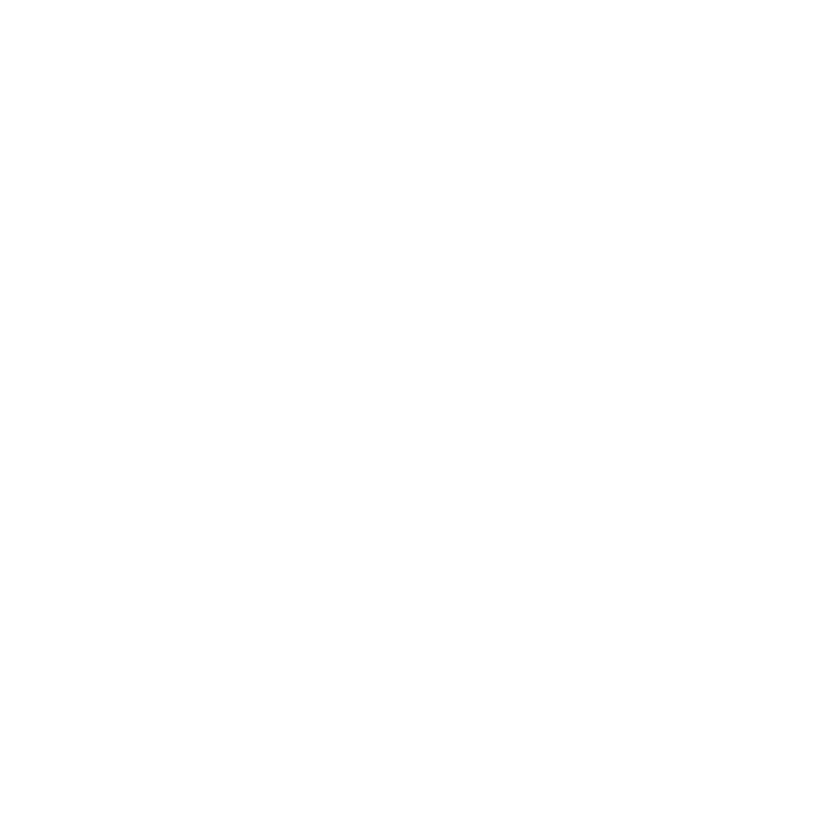

In [19]:
coupon_group %>% 
    group_by(PlayerID, Status) %>%
    summarise(n=n()) %>%
    spread(Status, n) %>%
    ungroup() %>%
    replace(is.na(.),0) %>%
    mutate(T = I + R + V) %>%
    mutate(R_rate = R/T) %>%
    arrange(desc(R)) %>%
    ggplot(aes(y=R)) + geom_point()

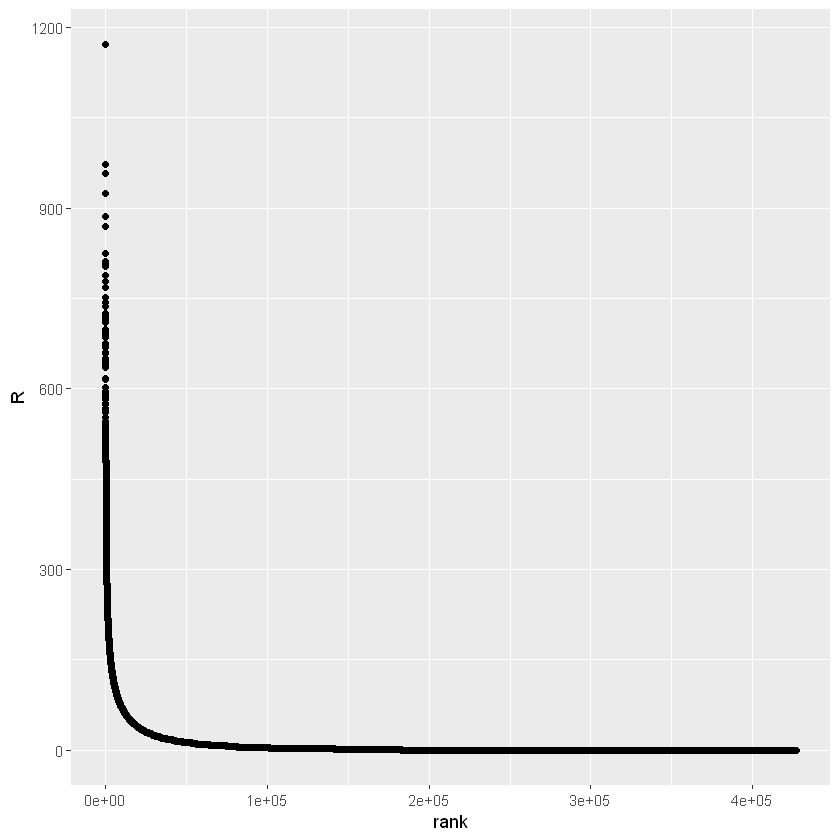

In [38]:
coupon_group %>% 
    group_by(PlayerID, Status) %>%
    summarise(n=n()) %>%
    spread(Status, n) %>%
    ungroup() %>%
    replace(is.na(.),0) %>%
    mutate(T = I + R + V) %>%
    mutate(rank = row_number(-R)) %>%
    ggplot(aes(x=rank, y=R)) + geom_point()

Most players don't redeem often

In [2]:
player_day = read_csv("U:\\Datasets\\PlayerDay.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  Date_Value = col_datetime(format = ""),
  TierName = col_character()
)
See spec(...) for full column specifications.


In [3]:
player_day %>% mutate(dow = wday(Date_Value, label = TRUE)) %>%
group_by(dow) %>%
summarise(n=n()) %>%
mutate(partof = n / sum(n))

dow,n,partof
Sun,1106699,0.1517500
Mon,783325,0.1074091
Tue,750622,0.1029249
Wed,836260,0.1146675
Thu,989293,0.1356513
Fri,1405601,0.1927353
Sat,1421110,0.1948619


Overwhelmingly weekend coverages. 

In [4]:
head(player_day)

SiteID,PlayerID,Date_Value,TtlBet,Theo,Actual,Comp,MktedCouponsRedemption,KioskRedemptions,PointsToCash,...,Slot_PointsEarned,Table_CompEarned,Table_PointsEarned,Days,NonGamingPointsEarned,NonGamingCompEarned,ADT,ADW,TierID,TierName
2,1000382937,2017-03-01,582.00,47.90,-23.43,0,0.01,5,0,...,38,0,0,1,0,0,30.7840,30.7840,25,Preferred
2,530533484,2017-03-01,3374.75,322.60,96.65,0,0.00,0,0,...,225,0,0,1,0,0,242.0050,242.0050,25,Preferred
1,530086340,2017-03-01,713.35,39.04,-32.10,0,0.00,0,0,...,33,0,0,1,0,0,47.8733,47.8733,24,Silver
2,710028836,2017-03-01,0.00,0.00,0.00,0,0.00,5,0,...,0,0,0,1,0,0,6.3400,6.3400,25,Preferred
1,1000611579,2017-03-01,951.10,83.13,-187.84,0,0.00,0,0,...,63,0,0,1,0,0,89.5912,89.5913,24,Silver
2,710015699,2017-03-01,486.17,38.99,146.22,0,0.00,0,0,...,32,0,0,1,0,0,39.0652,39.0652,24,Silver


In [9]:
colnames(player_day)

[1] "SiteID"                 "PlayerID"               "Date_Value"            
 [4] "TtlBet"                 "Theo"                   "Actual"                
 [7] "Comp"                   "MktedCouponsRedemption" "KioskRedemptions"      
[10] "PointsToCash"           "XCUsed"                 "GamingDays"            
[13] "CoinIn"                 "SlotAct"                "SlotTheo"              
[16] "TableBet"               "TableAct"               "TableTheo"             
[19] "Slot_CompEarned"        "Slot_PointsEarned"      "Table_CompEarned"      
[22] "Table_PointsEarned"     "Days"                   "NonGamingPointsEarned" 
[25] "NonGamingCompEarned"    "ADT"                    "ADW"                   
[28] "TierID"                 "TierName"

In [5]:
player_day %>% mutate(week(Date_Value)) %>% 

SiteID,PlayerID,Date_Value,TtlBet,Theo,Actual,Comp,MktedCouponsRedemption,KioskRedemptions,PointsToCash,...,Table_CompEarned,Table_PointsEarned,Days,NonGamingPointsEarned,NonGamingCompEarned,ADT,ADW,TierID,TierName,week(Date_Value)
2,1000382937,2017-03-01,582.00,47.90,-23.43,0.00,0.01,5.00,0,...,0.00,0,1,0,0,30.7840,30.7840,25,Preferred,9
2,530533484,2017-03-01,3374.75,322.60,96.65,0.00,0.00,0.00,0,...,0.00,0,1,0,0,242.0050,242.0050,25,Preferred,9
1,530086340,2017-03-01,713.35,39.04,-32.10,0.00,0.00,0.00,0,...,0.00,0,1,0,0,47.8733,47.8733,24,Silver,9
2,710028836,2017-03-01,0.00,0.00,0.00,0.00,0.00,5.00,0,...,0.00,0,1,0,0,6.3400,6.3400,25,Preferred,9
1,1000611579,2017-03-01,951.10,83.13,-187.84,0.00,0.00,0.00,0,...,0.00,0,1,0,0,89.5912,89.5913,24,Silver,9
2,710015699,2017-03-01,486.17,38.99,146.22,0.00,0.00,0.00,0,...,0.00,0,1,0,0,39.0652,39.0652,24,Silver,9
2,710204552,2017-03-01,6017.25,488.93,753.34,1.00,0.00,3.98,0,...,0.00,0,1,0,0,127.1979,127.1979,25,Preferred,9
2,1000401117,2017-03-01,206.81,14.54,19.99,0.00,0.00,0.00,0,...,0.00,0,1,0,0,11.9450,11.9450,25,Preferred,9
2,710704258,2017-03-01,704.10,53.20,360.52,0.00,0.00,1.99,0,...,0.00,0,1,0,0,119.1150,119.1150,22,Platinum,9
2,710102628,2017-03-01,277.50,17.92,95.55,0.00,0.00,5.00,0,...,0.00,0,1,0,0,61.8292,61.8292,22,Platinum,9


In [10]:
cpn_redeem = read_csv("U:\\Datasets\\FactCouponRedeem.csv")

Parsed with column specification:
cols(
  CouponID = col_double(),
  Description = col_character(),
  PlayerID = col_double(),
  AccountingDate = col_date(format = ""),
  RedeemValue = col_double(),
  RedeemCount = col_double(),
  SiteID = col_double(),
  RedemptionNumber = col_double(),
  ValidMonth = col_double(),
  ValidYear = col_double(),
  TypeCategory = col_character(),
  TypeDescription = col_character(),
  SubType = col_character(),
  SubTypeDescription = col_character(),
  TargetPopKey = col_character(),
  TargetPop = col_character(),
  ProgramTypeKey = col_character(),
  ProgramType = col_character()
)


In [11]:
head(cpn_redeem)

CouponID,Description,PlayerID,AccountingDate,RedeemValue,RedeemCount,SiteID,RedemptionNumber,ValidMonth,ValidYear,TypeCategory,TypeDescription,SubType,SubTypeDescription,TargetPopKey,TargetPop,ProgramTypeKey,ProgramType
89729,M1216VHNY- VIP NYE HTL,530342410,2017-01-01,29,1,1,NA,12,16,b,Hotel,a,ML,a,VIP,N,Not Applicable
89729,M1216VHNY- VIP NYE HTL,710328524,2017-01-01,29,1,1,NA,12,16,b,Hotel,a,ML,a,VIP,N,Not Applicable
89093,C1016OGDO1E-Decline GP WKND 5,1000600137,2017-01-01,5,1,2,NA,10,16,e,Free Slot Gaming,a,Grand Play,N,Not Applicable,N,Not Applicable
89729,M1216VHNY- VIP NYE HTL,710004002,2017-01-01,29,1,1,NA,12,16,b,Hotel,a,ML,a,VIP,N,Not Applicable
4,HNEW MEMBER TRACKING,1000681589,2017-01-01,0,1,2,NA,4,7,O,Other,O,Other,c,New Member,N,Not Applicable
71400,H0414NMOGEMP-$10 New Email PRT,1000681589,2017-01-01,10,1,2,16665127,4,14,e,Free Slot Gaming,a,Grand Play,N,Not Applicable,N,Not Applicable


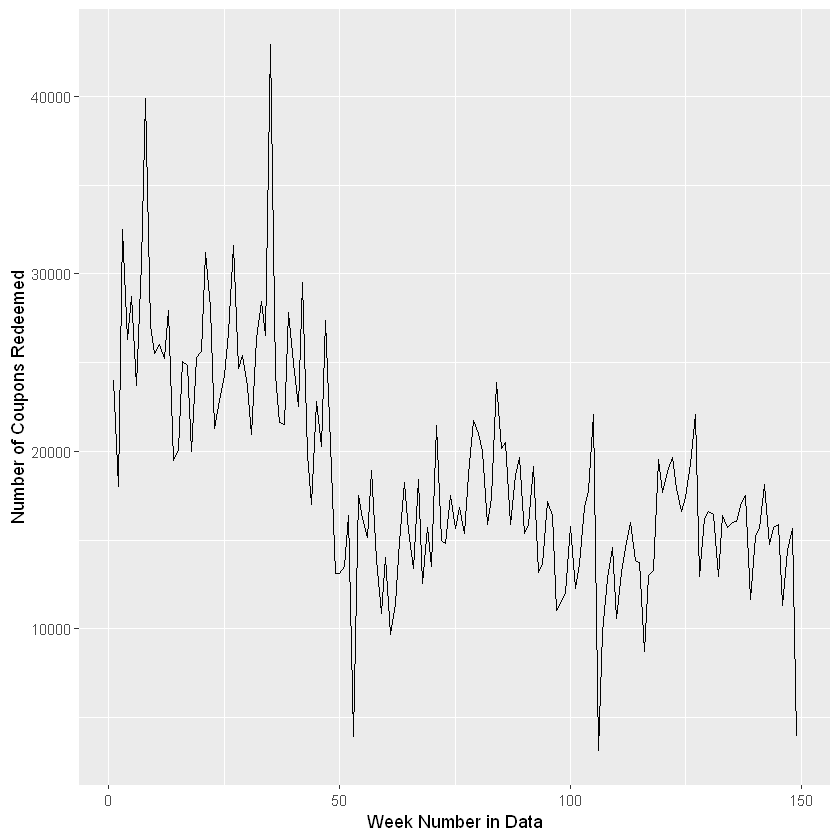

In [45]:
cpn_redeem %>% 
    mutate(weekno = week(AccountingDate), year = year(AccountingDate)) %>%
    group_by(weekno, year) %>%
    summarise(n = n()) %>%
    ungroup() %>%
    arrange(year, weekno) %>%
    mutate(id = row_number()) %>%
    ggplot(aes(x = id, y = n)) +
    geom_line() +
    xlab('Week Number in Data') +
    ylab('Number of Coupons Redeemed')

In [40]:
DimCoupon = read_csv("U:\\Datasets\\DimCoupon.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  CouponID = col_double(),
  CouponValue = col_double(),
  Type = col_double(),
  FrequencyStartDate = col_date(format = ""),
  FrequencyEndDate = col_date(format = ""),
  ValueType = col_double(),
  MaxAllowedPerDay = col_double(),
  MaxAllowedTotal = col_double(),
  ValidMonth = col_double(),
  ValidYear = col_double()
)
See spec(...) for full column specifications.


In [43]:
colnames(DimCoupon)

[1] "CouponID"           "Description"        "CouponValue"       
 [4] "Type"               "TypeDesc"           "FrequencyStartDate"
 [7] "FrequencyEndDate"   "ValueType"          "ValueTypeDesc"     
[10] "MaxAllowedPerDay"   "MaxAllowedTotal"    "Status"            
[13] "ValidMonth"         "ValidYear"          "TypeCategory"      
[16] "TypeDescription"    "SubType"            "SubTypeDescription"
[19] "TargetPopKey"       "TargetPop"          "ProgramTypeKey"    
[22] "ProgramType"

In [44]:
colnames(coupon_group)

[1] "CouponID"       "PlayerID"       "Status"         "CouponGroupID" 
[5] "PM_Create_Date" "PM_Last_Update"

In [ ]:
head(DimCoupon %>% inner_join(coupon_group, by = "CouponID")) %>%
    group_by(status.y) %>%
    summarise(n = n())


In [ ]:
"U:\Datasets\DimCoupon.csv"
"U:\Datasets\DimPlayer.csv"
"U:\Datasets\FactCouponRedeem.csv"
"U:\Datasets\PlayerDay.csv"


In [2]:
data = read_csv('D:\\Group Folder\\forcluster.csv')

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_double(),
  City = col_character(),
  State = col_character(),
  ZipCode = col_double(),
  DistFromML = col_double(),
  DistFromHK = col_double(),
  BirthYear = col_double(),
  PlayerStatus = col_character(),
  `Prison Flag` = col_character(),
  `DMA Flag` = col_character(),
  `Person #  Marital Status` = col_character(),
  `Estimated Current Home Value` = col_double(),
  `DSE  Discretionary Spend Estimate` = col_double(),
  `Est  Household Income V6` = col_double()
)
Warning message:
"34 parsing failures.
   row                               col expected                     actual                               file
898140 Estimated Current Home Value      a double Unknown Scored             'D:\Group Folder\forcluster.csv'
898140 DSE  Discretionary Spend Estimate a double Not Likely to have a child 'D:\Group Folder\forcluster.csv'
898141 Estimated Current Home Value      a dou

In [3]:
colnames(data)[11] <- 'MaritalStatus'

In [4]:
colnames(data)

[1] "X1"                                "City"                             
 [3] "State"                             "ZipCode"                          
 [5] "DistFromML"                        "DistFromHK"                       
 [7] "BirthYear"                         "PlayerStatus"                     
 [9] "Prison Flag"                       "DMA Flag"                         
[11] "MaritalStatus"                     "Estimated Current Home Value"     
[13] "DSE  Discretionary Spend Estimate" "Est  Household Income V6"

In [5]:
data$X1 <- NULL
names(data) = make.names(names(data))

In [6]:
colnames(data)

[1] "City"                              "State"                            
 [3] "ZipCode"                           "DistFromML"                       
 [5] "DistFromHK"                        "BirthYear"                        
 [7] "PlayerStatus"                      "Prison.Flag"                      
 [9] "DMA.Flag"                          "MaritalStatus"                    
[11] "Estimated.Current.Home.Value"      "DSE..Discretionary.Spend.Estimate"
[13] "Est..Household.Income.V6"

In [7]:
data = data %>% drop_na()

In [8]:
data$City = as.factor(data$City)
data$State = as.factor(data$State)
data$ZipCode = as.factor(data$ZipCode)
data$PlayerStatus = as.factor(data$PlayerStatus)
data$Prison.Flag = as.factor(data$Prison.Flag)
data$DMA.Flag = as.factor(data$DMA.Flag)
data$MaritalStatus = as.factor(data$MaritalStatus)

In [49]:
set.seed(7171989)

In [50]:
data_s = sample_n(data,25000)

In [51]:
gower_dist = daisy(data_s, metric = "gower")

In [52]:
sil_width <- c(NA)
for(i in 3:6){
    pam_fit <- pam(gower_dist, diss = TRUE, k = i)
    sil_width[i] <- pam_fit$silinfo$avg.width
}

plot(2:6, sil_width,
    xlab = "Number of clusters",
    ylab = "Silhouette Width")
lines(2:6, sil_width)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


In [12]:
sil_width

[1]        NA 0.1201072 0.1597305 0.1743627 0.1093720 0.1147653 0.1138308
[8] 0.0989359

In [13]:
k = 4
pam_fit <- pam(gower_dist, diss = TRUE, k)
pam_results <-data_s %>% mutate(cluster = pam_fit$clustering) %>% group_by(cluster) %>% do(the_summary = summary(.))
pam_results$the_summary

[[1]]
          City          State         ZipCode       DistFromML     
 SAINT CLOUD: 622   MN     :3419   56303  : 388   Min.   :    0.0  
 ONAMIA     : 183   WI     : 292   56359  : 183   1st Qu.:   41.0  
 MINNEAPOLIS: 136   ND     :  24   56301  : 147   Median :   50.0  
 SAINT PAUL : 123   MI     :   7   55037  :  92   Mean   :  147.9  
 HINCKLEY   :  92   FL     :   5   56304  :  85   3rd Qu.:   78.0  
 PINE CITY  :  84   IA     :   5   55063  :  84   Max.   :99999.0  
 (Other)    :2535   (Other):  23   (Other):2796                    
   DistFromHK        BirthYear    PlayerStatus Prison.Flag DMA.Flag  
 Min.   :    0.0   Min.   :1922   A:3620       No:3775     No :3742  
 1st Qu.:   47.0   1st Qu.:1942   D: 155                   Yes:  33  
 Median :   68.0   Median :1952   M:   0                             
 Mean   :  155.2   Mean   :1953                                      
 3rd Qu.:   76.0   3rd Qu.:1962                                      
 Max.   :99999.0   Max.   :200

In [34]:
data_s = data_s %>% mutate(cluster = pam_fit$clustering)

ERROR: Error in mutatge(., age = 2020 - BirthYear): could not find function "mutatge"


In [35]:
data_s = data_s %>% mutate(age = 2020 - BirthYear)

In [36]:
data_s

City,State,ZipCode,DistFromML,DistFromHK,BirthYear,PlayerStatus,Prison.Flag,DMA.Flag,MaritalStatus,Estimated.Current.Home.Value,DSE..Discretionary.Spend.Estimate,Est..Household.Income.V6,cluster,age
FINLAYSON,MN,55735,31,17,1954,A,No,No,Unknown Scored,170500,16432,56,1,66
CLOQUET,MN,55720,72,53,1949,A,No,No,Married Extremely Likely,149700,13775,47,2,71
MINNEAPOLIS,MN,55443,68,67,1978,A,No,No,Single Likely Never Married,0,9988,26,2,42
SUPERIOR,WI,54880,82,53,1972,A,No,No,Unknown Scored,81500,5841,19,1,48
SAINT CLOUD,MN,56304,43,67,1965,A,No,No,Single Likely Never Married,0,13961,25,1,55
FOREST LAKE,MN,55025,65,54,1940,A,No,No,Unknown Scored,0,14922,15,1,80
MINNEAPOLIS,MN,55423,86,83,1981,A,No,No,Married Likely,251600,30669,89,2,39
GILBERT,MN,55741,113,102,1950,A,No,No,Married Extremely Likely,0,17877,89,2,70
BAXTER,MN,56425,35,70,1959,A,No,No,Unknown Scored,127700,18239,57,1,61
SPOONER,WI,54801,86,49,1957,A,No,No,Married Extremely Likely,283200,21772,43,2,63


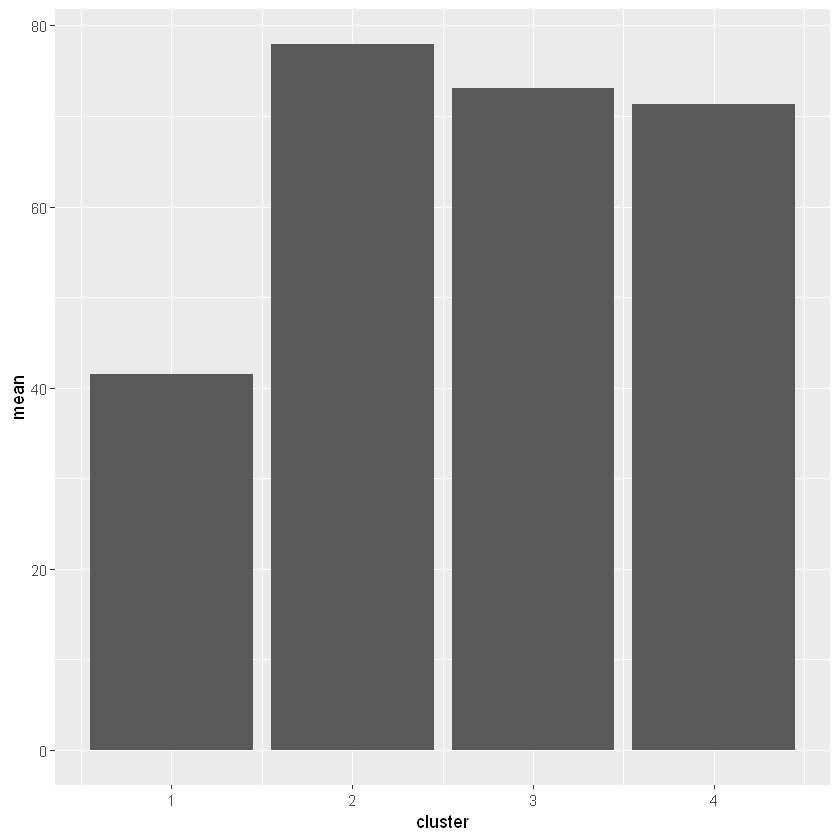

In [20]:
data_s %>% group_by(cluster) %>% summarize(mean = mean(Est..Household.Income.V6)) %>% 
ggplot(aes(x=cluster, y=mean)) + geom_bar(stat = "identity")

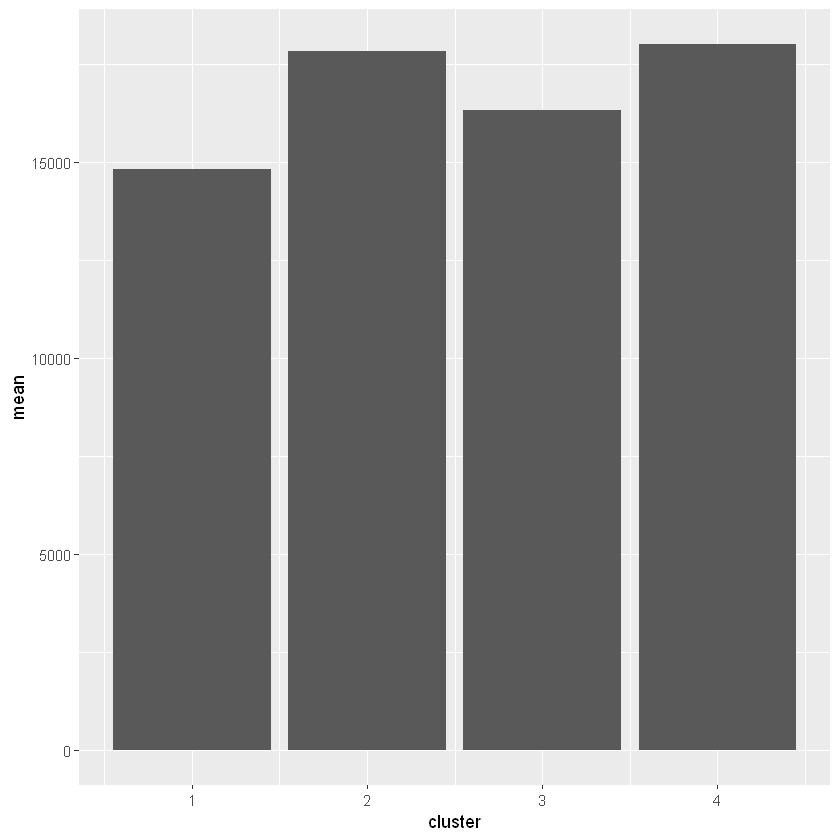

In [33]:
data_s %>% group_by(cluster) %>% summarize(mean = mean(DSE..Discretionary.Spend.Estimate)) %>% 
ggplot(aes(x=cluster, y=mean)) + geom_bar(stat = "identity")

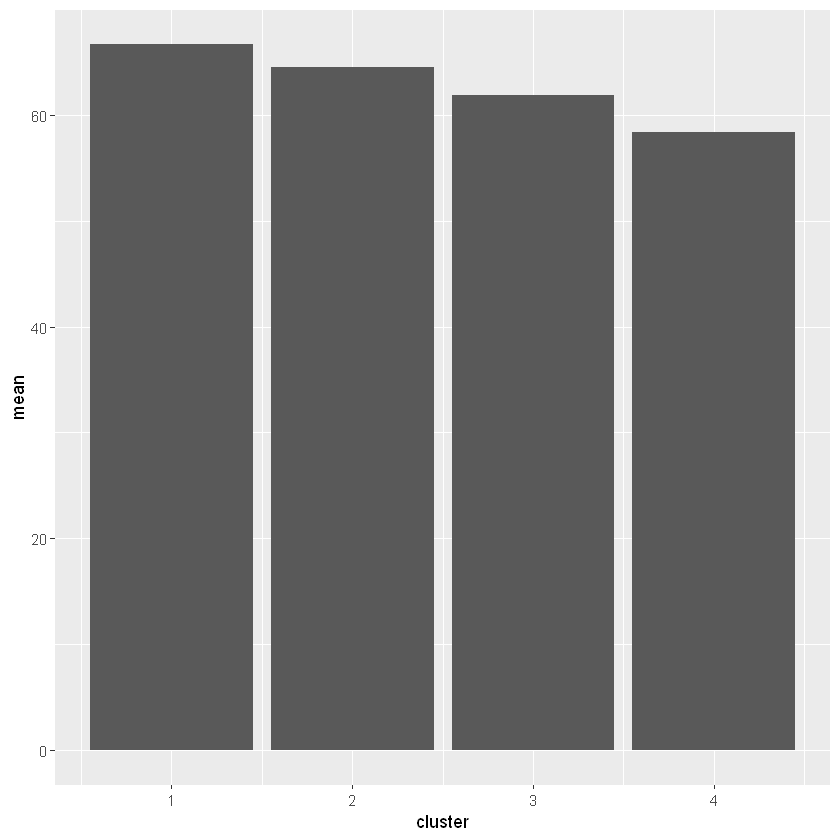

In [38]:
data_s %>% group_by(cluster) %>% summarize(mean = mean(age)) %>% 
ggplot(aes(x=cluster, y=mean)) + geom_bar(stat = "identity")

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."

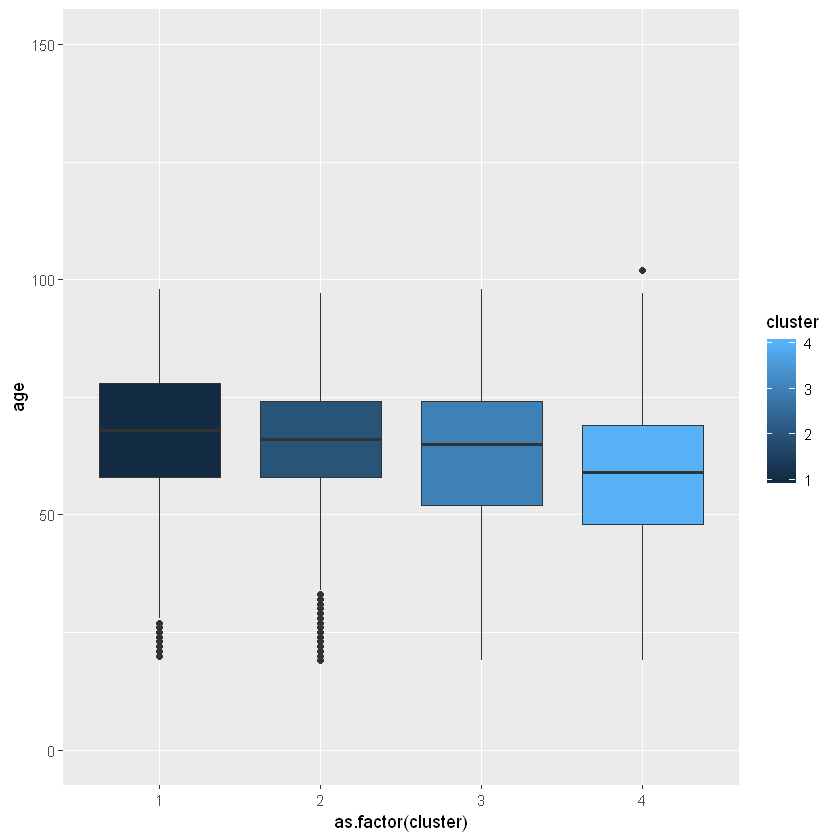

In [44]:
ggplot(data_s, aes(x=as.factor(cluster), y = age, fill = cluster)) + geom_boxplot() + ylim(0,150)

In [28]:
data_s %>% group_by(cluster, MaritalStatus) %>% summarise(n=n()) %>% spread(MaritalStatus, n)

cluster,Married Extremely Likely,Married Likely,Single Likely Never Married,Unknown Not Scored,Unknown Scored
1,259,76,756,88,2596
2,10636,218,429,260,130
3,284,99,266,3685,76
4,436,3944,391,280,91


In [32]:
data_s %>% group_by(cluster, City) %>% summarise(n=n()) %>% spread(cluster, n)

City,1,2,3,4
ABBOTSFORD,1,NA,NA,NA
ABERDEEN,NA,2,NA,NA
ADA,1,NA,NA,NA
ADAMS,NA,1,NA,NA
AFTON,NA,2,NA,1
AITKIN,82,148,37,58
AKELEY,1,1,3,1
ALBANY,3,34,3,16
ALBERT LEA,1,9,2,2
ALBERTVILLE,5,47,10,12
